LOADING THE DATASET:
Load the dataset from a CSV file into a Pandas DataFrame. This step is crucial for beginning the data analysis and preprocessing tasks. Make sure to specify the correct path to your dataset and use the appropriate delimiter if necessary (e.g., `delimiter=';'` for CSV files where data is separated by semicolons).

In [3]:
import pandas as pd

df = pd.read_csv(r'C:\Users\dodyn\OneDrive\Desktop\DSinternship\bank\bank.csv')

CHECKING MISSING VALUES:
Check for missing values in the dataset to identify columns that require further handling, such as filling in missing values or dropping the column.

In [4]:
# Check for missing values
print(df.isnull().sum())

# Encoding categorical variables using get_dummies for simplicity
df_encoded = pd.get_dummies(df, drop_first=True)


age;"job";"marital";"education";"default";"balance";"housing";"loan";"contact";"day";"month";"duration";"campaign";"pdays";"previous";"poutcome";"y"    0
dtype: int64


In [20]:
df_encoded.columns



Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'education_primary', 'education_secondary', 'education_tertiary',
       'education_unknown', 'default_no', 'default_yes', 'housing_no',
       'housing_yes', 'loan_no', 'loan_yes', 'contact_cellular',
       'contact_telephone', 'contact_unknown', 'month_apr', 'month_aug',
       'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'poutcome_failure', 'poutcome_other', 'poutcome_success',
       'poutcome_unknown', 'y'],
      dtype='object')

In [9]:
import pandas as pd

df = pd.read_csv(r'C:\Users\dodyn\OneDrive\Desktop\DSinternship\bank\bank.csv', delimiter=';')

In [19]:
df.head()


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,0
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,0
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,0
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,0
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,0


ENCODING CATEGORICAL VARIABLES:
Encode categorical variables to prepare the dataset for machine learning modeling. Categorical variables are transformed into numerical format using one-hot encoding, which is crucial for models that require numerical input. The target variable `y` is encoded separately with label encoding.

In [11]:
from sklearn.preprocessing import LabelEncoder

# Encoding the target variable 'y'
le = LabelEncoder()
df['y'] = le.fit_transform(df['y'])

# One-hot encoding for categorical variables
df_encoded = pd.get_dummies(df.drop('y', axis=1))

# Including the target variable back
df_encoded['y'] = df['y']


PREPARING THE DATA FOR MODELING:
Split the encoded dataset into features (X) and the target variable (y), and then divide these into training and testing sets. This step is vital for evaluating the performance of the machine learning model on unseen data, ensuring that our model can generalize well to new, unseen instances.

In [12]:
from sklearn.model_selection import train_test_split

X = df_encoded.drop('y', axis=1)
y = df_encoded['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


BUILDING THE DECISION TREE CLASSIFIER:
Instantiate and train the Decision Tree Classifier. This code block covers the creation of the decision tree model and its training using the training data. The decision tree is a popular machine learning model used for classification tasks.

In [13]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

EVALUATING THE MODEL:
Evaluate the performance of the Decision Tree Classifier on the test set. Using metrics such as accuracy and the classification report, we can assess how well our model has learned to predict the target variable `y`. This step is crucial for understanding the model's strengths and areas for improvement.

In [14]:
from sklearn.metrics import accuracy_score, classification_report

y_pred = clf.predict(X_test)

print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred))


Accuracy: 0.8917127071823204
              precision    recall  f1-score   support

           0       0.94      0.93      0.94       807
           1       0.50      0.54      0.52        98

    accuracy                           0.89       905
   macro avg       0.72      0.74      0.73       905
weighted avg       0.90      0.89      0.89       905



VISUALIZING THE DECISION TREE:
Visualize the trained Decision Tree to understand how it makes predictions. This visualization shows the tree structure, including decision nodes, leaves, and splits, providing insight into the decision-making process of the model. Setting `max_depth=3` limits the depth of the tree displayed for clarity.

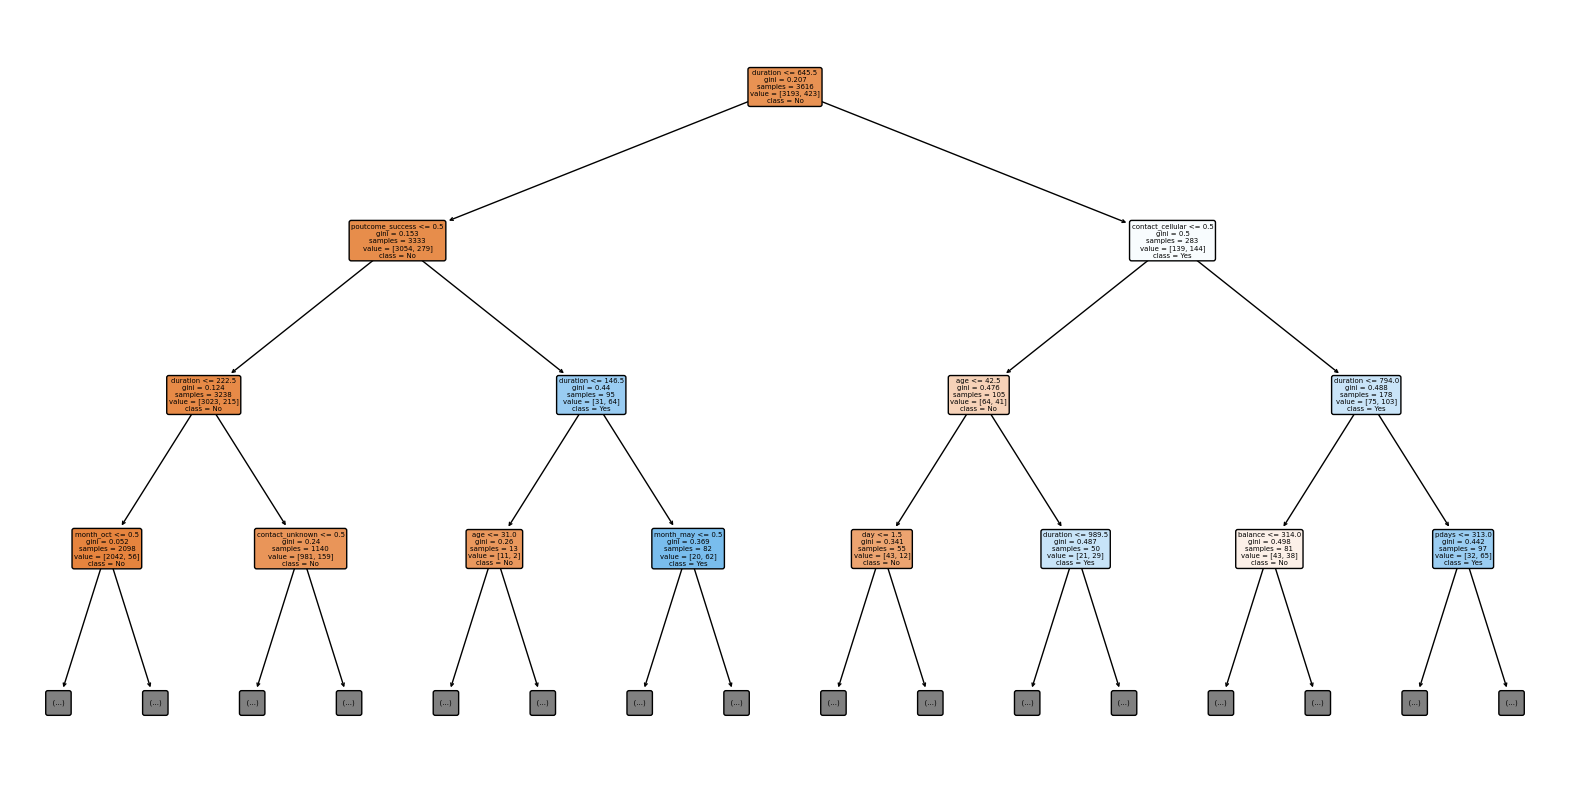

In [18]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Training the model (repeating this step for clarity)
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

plt.figure(figsize=(20,10))
plot_tree(clf, filled=True, feature_names=X.columns.tolist(), class_names=['No', 'Yes'], rounded=True, max_depth=3)
plt.show()
